# Financial Data Analysis by conneting API

The goal of this analysis is to perform detailed anaysis of the financial data like the trend analysis, comparitive studies using Python and create Visualizations to present our findings. 
The data is extracted using Nasdaq Data Link API which provides the data access to the wide range of financial datasets, I will be focussing on MER/F1 for detailed financial information.
Primary aims
1. To analyze the financial trend in 'accured expenses turnover' over a period for various companies, particularly banks 
2. To examone how different regions contribute to these financial metrics 

In [2]:
import requests
import json
import pandas as pd
import sys
print(sys.path)
import os
print(os.getcwd())

['/home/jovyan', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages']
/home/jovyan


In [3]:
!ls /home/jovyan
!mv /path/to/config.py /home/jovyan

Basics.ipynb  lost+found		 __pycache__
config.py     Mission893Solutions.ipynb  tmp
mv: cannot stat '/path/to/config.py': No such file or directory


In [4]:
%%writefile config.py
API_KEY = 'bmckndtSpAmq836-a65y' # this key is available from API 

Overwriting config.py


In [5]:
import config 
api_key = config.API_KEY

In [6]:
# Finding base url from API('https://docs.data.nasdaq.com/docs/in-depth-usage-1')
Base_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
Parameters = {'api_key':api_key,
               'qopts.per_page' :10} # return only 10 rows 
#getting data from API
json_data= requests.get(Base_url, params = Parameters).json() # also conerting the data into json format 
print(json_data)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

## processing of JSON data 

In [7]:
Base_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
Parameters = {'api_key':api_key,
               'qopts.per_page' :10000} # return only 10 rows 
#getting data from API
json_data= requests.get(Base_url, params = Parameters).json() # also conerting the data into json format 

data = json_data['datatable']['data'] # defining what is data and what is columns
columns = [col['name'] for col in json_data['datatable']['columns']] 
# Converting to DataFrame 
df_metric = pd.DataFrame(data, columns = columns)
print(df_metric.head())


   compnumber    reportid  mapcode     amount  reportdate reporttype  \
0        2438  1868192544    -1802  10.481948  2011-06-30         Q2   
1        2438  1868216112    -1802   8.161754  2011-09-30         Q3   
2        2438  1885063456    -1802  10.788213  2012-06-30         Q2   
3        2438  1885087024    -1802   9.437545  2012-09-30         Q3   
4        2438  1901934112    -1802   8.755041  2013-06-30         Q2   

  auditorstatus currency consolidated          longname  ...  \
0             U      EUR         True  Deutsche Bank AG  ...   
1             U      EUR         True  Deutsche Bank AG  ...   
2             U      EUR         True  Deutsche Bank AG  ...   
3             U      EUR         True  Deutsche Bank AG  ...   
4             U      EUR         True  Deutsche Bank AG  ...   

                city statecode country zipcode     phonenumber  \
0  Frankfurt am Main      None     DEU   60325  (49) 69 910 00   
1  Frankfurt am Main      None     DEU   60325  (4

## Understanding the Dataset

Data description 
compnumber	Unique identifier for each company,
reportid	ID associated with a specific financial report,
mapcode	Code representing a specific financial metric or data point,
amount	Numerical value of the financial metric,
reportdate	Date of the financial report,
reporttype	Type of the report (e.g., Q1, Q2),
currency	Currency in which financial amounts are reported,
longname	The name of the bank or company,
city	The city to which a given bank or company belong,
country	Region to which a given bank or company is situated,
...	...
indicator	Specific financial indicator being reported,
statement	Type of financial statement from which the data is derived.

In [8]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [11]:
necessary_columns=['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']
# For our primary goals these are the necessary columns 

## Filtering the DataFrame fo Analysis

In [44]:
df = df_metric[necessary_columns]
filtered_df = df[df['indicator'] == 'Accrued Expenses Turnover']
filtered_df['indicator'].describe()
filtered_df['country'].describe()

count     139
unique      7
top       USA
freq       31
Name: country, dtype: object

In [16]:
filtered_df.describe()

,reportid,amount
count,1.390000e+02,139.000000
mean,1.633594e+09,26.908762
std,1.385283e+08,33.097291
min,1.504051e+09,4.689773
25%,1.543963e+09,9.675670
50%,1.581646e+09,13.753753
75%,1.622541e+09,31.777614
max,1.952498e+09,229.810427


Accured Expenses Turnover is a financial efficiency ration, it ensures how often a company pays off its accured expenses within a certain period. The minimum amount paid 4.689 and maximum amount is 229.81 the amount varies between wide range of expenses. it can also be observed that the maximum amount is way higher than 75 percentile.The mean amount paid is 26.90. The standard deviation of 33.10 suggests substantial differences in how companies manage their short-term liabilities, influenced by factors like industry and company size.

## Enhancing the Dataset

In [45]:
def update_country_name(name):
    if name=='USA':
        name='United State of America'
    elif name=='JPN':
        name='Japan'
    elif name=='CYM':
        name='Cayman Islands'
    elif name=='BHS':
        name='Bahamas'
    elif name=='DEU':
        name='Germany'
    else:
        name='Ireland'
    
    return name
filtered_df=filtered_df.copy()
filtered_df['country_name'] = filtered_df['country'].apply(update_country_name)
filtered_df.columns=['report_id','report_date','report_type',
                   'amount','company_name','country','region',
                   'indicator','statement','country_name']
updated_df=filtered_df.copy()
updated_df['country_name'].value_counts()

country_name
United State of America    31
Ireland                    29
Japan                      27
Cayman Islands             27
Bahamas                    19
Germany                     6
Name: count, dtype: int64

## Understanding Financial Trends Over Time 

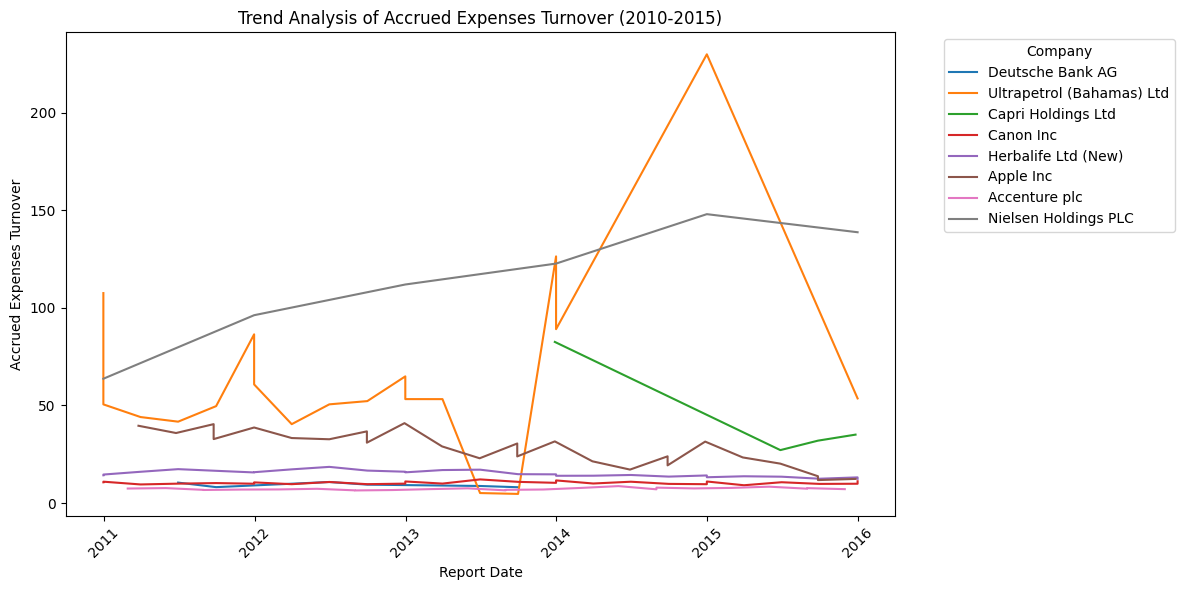

In [38]:
import matplotlib.pyplot as plt

updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

relevant_dt = updated_df[['company_name','report_date','amount']].copy()

# Plotting the trend
plt.figure(figsize=(12, 6))

for company in relevant_dt['company_name'].unique():
    company_data = relevant_dt[relevant_dt['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label=company)

plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Graphical Regional Analysis 

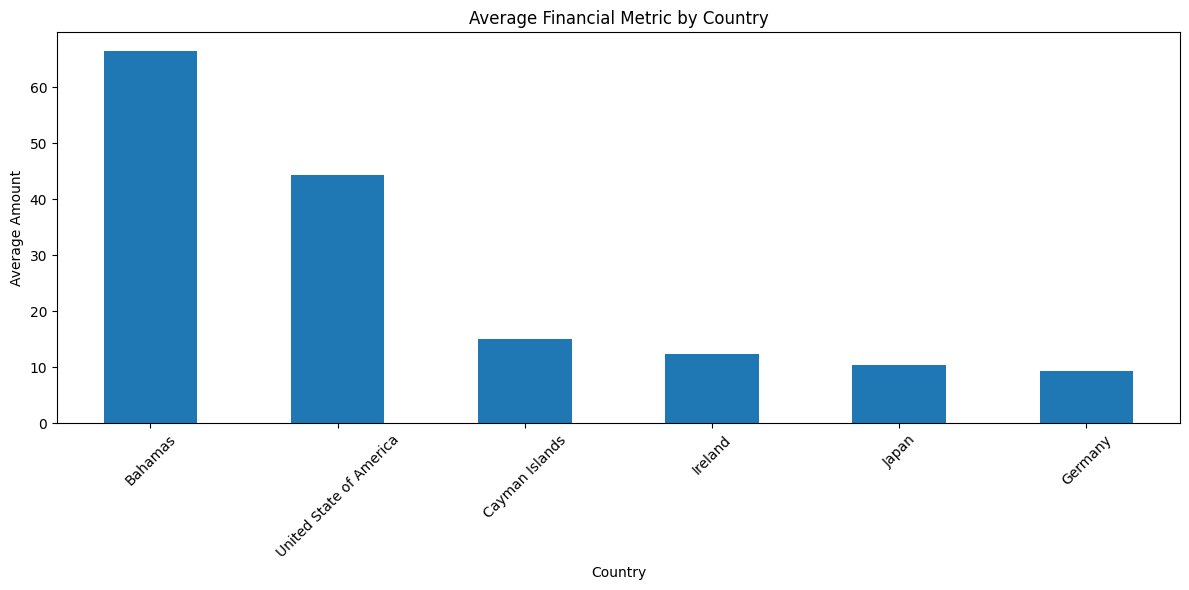

In [46]:
country_avg = updated_df.groupby('country_name')['amount'].mean()
# Plotting for Geographical Region Analysis
plt.figure(figsize=(12, 6))
country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()